In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

# Selenium

+ Chrome Driver 또는 PhantomJS
    - 구글에서 'chrome driver'로 검색하여 현재 버전에 맞는 프로그램을 다운로드

+ pip install selenium

In [4]:
from selenium import webdriver

In [5]:
driver = webdriver.Chrome("C:/Users/acorn/Downloads/chromedriver")
driver.get("https://www.naver.com")

In [6]:
driver.save_screenshot("data/001.png") # 화면 캡처

True

In [7]:
driver.close()

#### 'daum' 웹사이트 띄워서 로그인하기

In [8]:
driver = webdriver.Chrome("C:/Users/acorn/Downloads/chromedriver")

# 로그인 창 주소
driver.get("https://logins.daum.net/accounts/signinform.do?url=https%3A%2F%2Fwww.daum.net%2F")

In [9]:
# 아이디 입력창
elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("jymok007")

# 비밀번호 입력창
elem_pwd = driver.find_element_by_id("inputPwd")
elem_pwd.clear()
elem_pwd.send_keys("jhlds260!")

# 로그인 클릭 (copy xpath)
xpath = """//*[@id="loginBtn"]"""
driver.find_element_by_xpath(xpath).click()

In [10]:
driver.close()

---
# 셀프 주유소는 과연 저렴한가?

- 실제 셀프 주유소가 저렴한지에 대한 팩트 체크
- 가장 싼 주유소는 어디인가?
- https://www.opinet.co.kr

### 1. 서울시 구별 주유소 가격 정보 가져오기

#### (1) Sample Code

In [27]:
driver = webdriver.Chrome("C:/Users/acorn/Downloads/chromedriver")
driver.get("https://www.opinet.co.kr/searRgSelect.do")

In [30]:
##### 시, 도 목록 가져오기

si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")
si_list = si_list_raw.find_elements_by_tag_name("option")

si_list[1].get_attribute("value") # 서울특별시

si_names = [si.get_attribute("value") for si in si_list] # 모든 시, 도 리스트 
si_names.remove("") # 첫번째 빈 값은 빼기
si_names


['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [31]:
##### 시 선택하기 # 서울특별시
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(si_names[0]) # 서울특별시

In [32]:
##### 구 목록 가져오기
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

gu_names = [gu.get_attribute("value") for gu in gu_list] # 모든 시, 도 리스트 
gu_names.remove("") # 첫번째 빈 값은 빼기
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [33]:
##### 구 선택하기
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0]) # 강남구

In [34]:
##### 조회 버튼 누르기
driver.find_element_by_xpath("""//*[@id="searRgSelect"]/span""").click()


In [35]:
##### 엑셀저장 버튼 누르기
driver.find_element_by_xpath("""//*[@id="glopopd_excel"]/span""").click()

#### (2) 지역별(구 별)로 주유소 정보를 엑셀파일로 저장

In [36]:
from tqdm import tqdm_notebook
import time

In [41]:
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(1)
    
    driver.find_element_by_xpath("""//*[@id="searRgSelect"]/span""").click()
    
    time.sleep(1)
    
    driver.find_element_by_xpath("""//*[@id="glopopd_excel"]/span""").click()
    
    time.sleep(1)
    
driver.close()

  0%|          | 0/25 [00:00<?, ?it/s]

### 2. Data Preprocessing

#### (1) 저장된 엑셀 파일 불러오기

In [43]:
from glob import glob

In [57]:
station_files = glob("data/oil/지역*.xls")
station_files

tmp_raw = []
for fname in station_files:
    tmp = pd.read_excel(fname, header=2)
    tmp_raw.append(tmp)

In [58]:
len(tmp_raw)

25

In [59]:
##### 데이터 프레임으로 합치기

station_raw = pd.concat(tmp_raw)
station_raw.head(30)
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 38
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      486 non-null    object
 1   상호      486 non-null    object
 2   주소      486 non-null    object
 3   상표      486 non-null    object
 4   전화번호    486 non-null    object
 5   셀프여부    486 non-null    object
 6   고급휘발유   486 non-null    object
 7   휘발유     486 non-null    object
 8   경유      486 non-null    object
 9   실내등유    486 non-null    object
dtypes: object(10)
memory usage: 41.8+ KB


In [60]:
stations = pd.DataFrame({"Oil_store":station_raw["상호"], 
                        "주소":station_raw["주소"],
                        "가격":station_raw["휘발유"],
                        "셀프":station_raw["셀프여부"],
                        "상표":station_raw["상표"]})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스


In [61]:
##### 구 컬럼 추출

stations["구"] = [addr.split()[1] for addr in stations["주소"]]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스,강동구


In [62]:
print(stations["구"].unique())
print(len(stations["구"].unique()))

['강동구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구'
 '강북구' '용산구' '은평구' '종로구' '중구' '중랑구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구'
 '도봉구' '강남구']
25


In [63]:
##### 가격이 없는 주유소 제외

stations["가격"].unique()

stations[stations["가격"] == "-"]

stations = stations[stations["가격"] != "-"]

In [64]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  474 non-null    object
 1   주소         474 non-null    object
 2   가격         474 non-null    object
 3   셀프         474 non-null    object
 4   상표         474 non-null    object
 5   구          474 non-null    object
dtypes: object(6)
memory usage: 25.9+ KB


In [65]:
##### 가격 정보를 수치로 변환

stations["가격"] = [float(val) for val in stations["가격"]]
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  474 non-null    object 
 1   주소         474 non-null    object 
 2   가격         474 non-null    float64
 3   셀프         474 non-null    object 
 4   상표         474 non-null    object 
 5   구          474 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.9+ KB


In [66]:
stations.head(30)

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
5,방아다리주유소,서울 강동구 동남로 811 (명일동),1648.0,Y,SK에너지,강동구
6,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1649.0,N,GS칼텍스,강동구
7,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1653.0,N,SK에너지,강동구
8,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1658.0,Y,S-OIL,강동구
9,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1659.0,Y,SK에너지,강동구


In [67]:
stations.reset_index(inplace=True)

In [68]:
stations

,index,Oil_store,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...,...
469,32,경원주유소,서울 강남구 도산대로 428 (청담동),2056.0,N,S-OIL,강남구
470,33,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2068.0,N,GS칼텍스,강남구
471,34,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069.0,N,GS칼텍스,강남구
472,35,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구


In [69]:
del stations["index"]

In [70]:
stations

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
469,경원주유소,서울 강남구 도산대로 428 (청담동),2056.0,N,S-OIL,강남구
470,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2068.0,N,GS칼텍스,강남구
471,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069.0,N,GS칼텍스,강남구
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구


#### (2) 주유소의 상표별로 얼마나 저렴한가?


<AxesSubplot:xlabel='상표', ylabel='가격'>

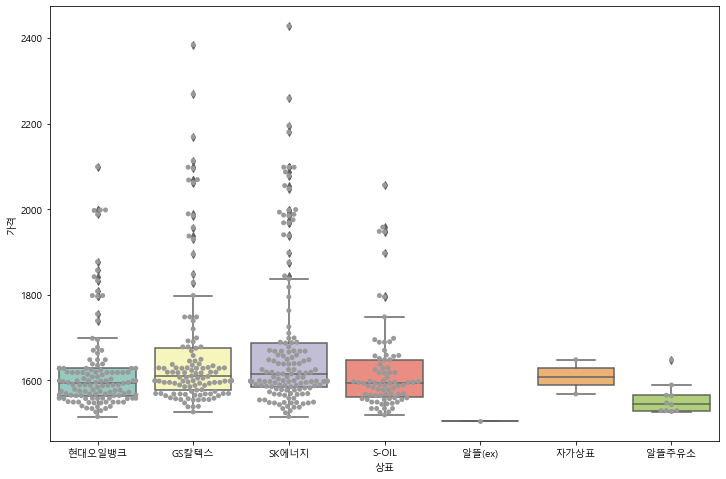

In [72]:
plt.figure(figsize=(12,8))

sns.boxplot(x="상표",y="가격",data=stations, palette="Set3")
sns.swarmplot(x="상표",y="가격",data=stations, color=".6")

#### (3) 구 별 주유 가격 확인

In [73]:
##### 서울시에서 가장 주유가격이 비싼 곳은 어디인가? (10개만 확인)

stations.sort_values(by="가격",ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
294,서남주유소,서울 중구 통일로 30,2428.0,N,SK에너지,중구
259,서계주유소,서울 용산구 청파로 367 (서계동),2384.0,N,GS칼텍스,용산구
293,필동주유소,서울 중구 퇴계로 196 (필동2가),2269.0,N,GS칼텍스,중구
292,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259.0,N,SK에너지,중구
473,뉴서울(강남),서울 강남구 언주로 716,2195.0,N,SK에너지,강남구
258,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2180.0,N,SK에너지,용산구
291,약수주유소,서울 중구 다산로 173,2169.0,N,GS칼텍스,중구
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구
233,현대오일뱅크㈜직영 여의도현대주유소,서울 영등포구 의사당대로 154 (여의도동),2099.0,N,현대오일뱅크,영등포구
283,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구


In [74]:
##### 서울시에서 가장 주유가격이 싼 곳은 어디인가? (10개만 확인)

stations.sort_values(by="가격",ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1504.0,Y,알뜰(ex),서초구
207,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515.0,Y,현대오일뱅크,영등포구
208,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1515.0,Y,SK에너지,영등포구
209,성락주유소,서울 영등포구 가마산로 414 (신길동),1519.0,Y,S-OIL,영등포구
181,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1524.0,N,SK에너지,양천구
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1525.0,Y,S-OIL,양천구
234,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1526.0,Y,현대오일뱅크,강북구
235,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1526.0,Y,S-OIL,강북구
236,수유동주유소,서울 강북구 도봉로 395 (수유동),1526.0,Y,GS칼텍스,강북구
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1527.0,N,알뜰주유소,성북구


In [78]:
##### 구 별로 평균값 산출
gu_mean = stations.groupby("구").mean()["가격"]
gu_mean = pd.pivot_table(stations, index=["구"], values=["가격"])
gu_mean.head()

,가격
구,
강남구,1791.270270
강동구,1682.437500
강북구,1548.153846
강서구,1598.696970
관악구,1626.687500


In [79]:
##### 위의 구별 평균 값을 지도로 표시 

import folium
import json

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)
map

geo_str = json.load(open(geo_path, encoding="utf-8"))
map.choropleth(geo_data=geo_str, data=gu_mean,
              columns=[gu_mean.index, "가격"],
              key_on="feature.id", fill_color="YlGn")
map

#### (4)  주유가격 상하위 10씩을 지도에 표시

In [80]:
oil_price_top10 = stations.sort_values(by="가격",ascending=False).head(10)
oil_price_bottom10 = stations.sort_values(by="가격",ascending=True).head(10)

In [83]:
import requests

header = {"Authorization" : "KakaoAK ac954f19cba068733317852b32bb6e06"}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format("서울 중구 통일로 30")

requests.get(url, headers=header).json()

{'documents': [{'address_name': '서울 중구 봉래동1가 126-2',
   'category_group_code': 'OL7',
   'category_group_name': '주유소,충전소',
   'category_name': '교통,수송 > 자동차 > 주유,가스 > 주유소 > SK주유소',
   'distance': '',
   'id': '11378206',
   'phone': '02-752-2262',
   'place_name': '서남주유소',
   'place_url': 'http://place.map.kakao.com/11378206',
   'road_address_name': '서울 중구 통일로 30',
   'x': '126.972067727197',
   'y': '37.5583624710728'},
  {'address_name': '서울 중구 봉래동1가 126-2',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 화장실',
   'distance': '',
   'id': '26334205',
   'phone': '',
   'place_name': '서남주유소 1층 개방화장실',
   'place_url': 'http://place.map.kakao.com/26334205',
   'road_address_name': '서울 중구 통일로 30',
   'x': '126.97211866524381',
   'y': '37.558340859180305'},
  {'address_name': '서울 중구 봉래동1가 126-2',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 전자제품 > 전자제품서비스센터 > 컴퓨터수리',
   'distance': '',
   'id': '35959655

In [86]:
print(requests.get(url, headers=header).json()["documents"][0].get("x"))
print(requests.get(url, headers=header).json()["documents"][0].get("y"))

126.972067727197
37.5583624710728


In [95]:
##### top10 주소에서 동 이름 빼서 위도경도 구하기

lat = []
lng = []

for i in oil_price_top10.index:
    tmp_addr = oil_price_top10["주소"][i].split("(")[0]
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])
    
oil_price_top10["lat"] = lat
oil_price_top10["lng"] = lng

In [99]:
##### bottom10 주소에서 동 이름 빼서 위도경도 구하기

lat = []
lng = []

for i in oil_price_bottom10.index:
    tmp_addr = oil_price_bottom10["주소"][i].split("(")[0]
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])
    
oil_price_bottom10["lat"] = lat
oil_price_bottom10["lng"] = lng

In [101]:
oil_price_top10.head()
oil_price_bottom10.head()

,Oil_store,주소,가격,셀프,상표,구,lat,lng
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1504.0,Y,알뜰(ex),서초구,37.4594852424923,127.043140747618
207,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515.0,Y,현대오일뱅크,영등포구,37.5023384820066,126.89960044004
208,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1515.0,Y,SK에너지,영등포구,37.501617839067855,126.89873398922153
209,성락주유소,서울 영등포구 가마산로 414 (신길동),1519.0,Y,S-OIL,영등포구,37.503742240123366,126.90282290508168
181,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1524.0,N,SK에너지,양천구,37.5370183706843,126.834287158433


In [106]:
map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)
for n in oil_price_top10.index:
    folium.CircleMarker(location=[oil_price_top10["lat"][n],oil_price_top10["lng"][n]],popup=oil_price_top10["Oil_store"][n],
                       radius=10, color="#CD3181", fill_color="#CD3181", fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    folium.CircleMarker(location=[oil_price_bottom10["lat"][n],oil_price_bottom10["lng"][n]],popup=oil_price_bottom10["Oil_store"][n],
                       radius=10, color="#3186CC", fill_color="#3186CC", fill=True).add_to(map)

map
        

## *. 스크래핑 연습

In [107]:
url = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=제주도날씨"

"""
오늘의 날씨
----> 서울날씨:30 ℃ 	 구름많음, 어제보다 1˚ 높아요
----> 부산날씨:22 ℃ 	 흐림, 어제보다 4˚ 낮아요
----> 제주도날씨:22 ℃ 	 구름많음, 어제보다 0˚ 높아요
----> 광주날씨:27 ℃ 	 구름많음, 어제보다 1˚ 낮아요
----> 대전날씨:29 ℃ 	 구름많음, 어제보다 1˚ 낮아요
----> 경기도날씨:29 ℃ 	 구름많음, 어제보다 2˚ 낮아요
"""

In [108]:
url = "http://ncov.mohw.go.kr/"

"""
--> 오늘의 신규 확진자 :전일대비 (+ 399)
--> 현재까지 확진자 :(누적)148,273
"""


'\n--> 오늘의 신규 확진자 :전일대비 (+ 399)\n--> 현재까지 확진자 :(누적)148,273\n'

In [109]:
url = "https://www.naver.com"

"""
오늘의 뉴스

---> 정은경 "백신 오접종 총 105건 발생…90건이 접종대상 오류"
---> G7 회의서 드러난 일본 속내…가입 반대·회담 일방취소
---> 코스피 일주일 만에 최고치 경신… 3,252.13 마감
---> 가해자 조사 뭉갠 공군검찰 수사 압색 후 '잠잠'…봐주기식 우려
---> 전두환 재판 불출석…조영대 신부 "부정해도 죄 가릴 수 없다"
---> 우체국 택배노조 "사회적 합의 어겨"…점거농성 돌입
---> 이준석 "파격이 새로움 넘어 여의도의 새 표준 돼야"
---> 박용진 "파죽지세로 나가겠다…우파 정책도 끌어안아야"
---> 청양 저수지 쇠줄 두른 시신은 50대 지역 주민
---> 머스크 비트코인 결제 중단 번복하자 비트코인 11% 뛰어

"""

'\n오늘의 뉴스\n\n---> 정은경 "백신 오접종 총 105건 발생…90건이 접종대상 오류"\n---> G7 회의서 드러난 일본 속내…가입 반대·회담 일방취소\n---> 코스피 일주일 만에 최고치 경신… 3,252.13 마감\n---> 가해자 조사 뭉갠 공군검찰 수사 압색 후 \'잠잠\'…봐주기식 우려\n---> 전두환 재판 불출석…조영대 신부 "부정해도 죄 가릴 수 없다"\n---> 우체국 택배노조 "사회적 합의 어겨"…점거농성 돌입\n---> 이준석 "파격이 새로움 넘어 여의도의 새 표준 돼야"\n---> 박용진 "파죽지세로 나가겠다…우파 정책도 끌어안아야"\n---> 청양 저수지 쇠줄 두른 시신은 50대 지역 주민\n---> 머스크 비트코인 결제 중단 번복하자 비트코인 11% 뛰어\n\n'

In [ ]:
url ="https://search.naver.com/search.naver?sm=tab_hty.top&whttps://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EB%A9%9C%EB%A1%A0%EC%B0%A8%ED%8A%B8&tqi=UrZ0HsprvN8ssK5ZP%2BsssssstVh-314088here=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EC%9D%8C%EC%9B%90&tqi=hKk9udp0J14ssfLos3Kssssssl4-396598"
